In [1]:
import numpy as np
import skimage
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import sys

# Hot-rod (Derenzo) Phantom

In [159]:
def put_disk_at_xy(img, xy, radius, value, ratio):
    xx, yy = skimage.draw.circle_perimeter(int(xy[0]), int(xy[1]), radius)
    img[xx, yy] = value * ratio
    xx, yy = skimage.draw.disk((int(xy[0]), int(xy[1])), radius)
    img[xx, yy] = value


def get_hot_rod_xy(Nlayer, origin, pitch):
    xy_list = []
    for ilayer in range(0, Nlayer):
        ilayer_y = origin[1] + pitch * math.sin(math.pi / 3) * ilayer
        ilayer_x_start = origin[0] + pitch * 0.5 * ilayer
        for idot in range(0, Nlayer - ilayer):
            idot_x = int(ilayer_x_start + pitch * idot)
            idot_y = int(ilayer_y)
            xy_list.append((idot_x, idot_y))
    return xy_list


def shift_xylist(shifts, xylist):
    newlist = []
    for dot_xy in xylist:
        new_x = dot_xy[0] + shifts[0]
        new_y = dot_xy[1] + shifts[1]
        newlist.append([int(new_x), int(new_y)])
    return np.array(newlist)


def transform_xylist(angrad, imgDims, xylist):
    newlist = []
    for dot_xy in xylist:
        temp_x = dot_xy[0] - imgDims[0] * 0.5
        temp_y = dot_xy[1] - imgDims[1] * 0.5
        new_x = temp_x * math.cos(angrad) - temp_y * math.sin(angrad)
        new_y = temp_x * math.sin(angrad) + temp_y * math.cos(angrad)
        new_x = new_x + imgDims[0] * 0.5
        new_y = new_y + imgDims[1] * 0.5
        newlist.append((int(new_x), int(new_y)))
    return newlist

In [3]:
# for idx in range(0,6):
imgN_x_ = 180
imgN_y_ = 180
img = np.zeros((imgN_x_, imgN_y_))
mask = np.zeros((imgN_x_, imgN_y_))
radii = np.array([2, 3, 4, 6, 7, 9])
pitches = 4 * radii
R_min = 20
R_max = 90
Nlayers = (R_max - R_min) / pitches
print(pitches)
print(Nlayers)
Nlayers = np.ceil(Nlayers)
print(Nlayers)
shift_Rs = np.array([16, 20, 18, 30, 25, 36])
for idx in range(0, 6):
    angle_rad = idx * math.pi / 3
    section_xylist = get_hot_rod_xy(
        int(Nlayers[idx]), (imgN_x_ / 2, imgN_y_ / 2), pitches[idx]
    )
    section_xylist = np.asarray(section_xylist)
    shift_x = math.cos(math.pi / 6) * shift_Rs[idx]
    shift_y = math.sin(math.pi / 6) * shift_Rs[idx]
    section_xylist = shift_xylist(np.array([shift_x, shift_y]), section_xylist)
    section_xylist = transform_xylist(angle_rad, (imgN_x_, imgN_y_), section_xylist)
    for dot_xy in section_xylist:
        put_disk_at_xy(img, dot_xy, radii[idx], 10, ratio=0.7)
        put_disk_at_xy(mask, dot_xy, radii[idx], idx + 1, ratio=1)
        # img[dot_xy] = (idx+1)*10
# put_disk_at_xy(img, (int(imgN_x_/2), int(imgN_y_/2)), 5)
# for idxj in range(1,N_layers[idx]):

fig, ax = plt.subplots(figsize=(16, 10), dpi=100)
norm = plt.Normalize(0, 10)
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["white", "orange"])
cbar = fig.colorbar(
    ax.imshow(
        img.T, origin="lower", cmap=mpl.colormaps["gray"], norm=norm, aspect="equal"
    ),
    pad=0.01,
)
for idx in range(0, 6):
    ax.plot(
        [90, math.cos(idx * math.pi / 3) * R_max + 90],
        [90, math.sin(idx * math.pi / 3) * R_max + 90],
        color="w",
        ls=":",
    )

[ 8 12 16 24 28 36]
[8.75       5.83333333 4.375      2.91666667 2.5        1.94444444]
[9. 6. 5. 3. 3. 2.]


NameError: name 'get_hot_rod_xy' is not defined

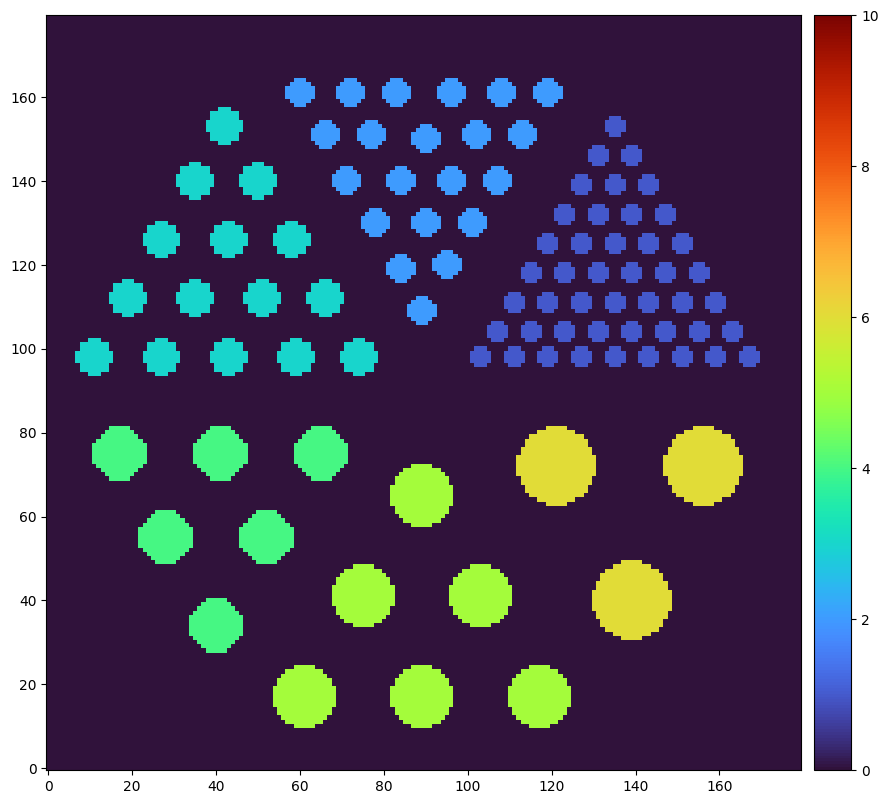

In [161]:
fig, ax = plt.subplots(figsize=(16, 10), dpi=100)
norm = plt.Normalize(0, 10)
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["white", "orange"])
cbar = fig.colorbar(
    ax.imshow(mask.T, origin="lower", cmap=mpl.colormaps['turbo'], norm=norm, aspect="equal"), pad=0.01
)

In [162]:
np.savez("hot_rod_phantom_180x180.npz",phantom=img,mask=mask)

In [ ]:
img = np.zeros((180, 180))
mask = np.zeros((180, 180))
radii = [2,4,6,8,10,12]
R=55
for idx in range(0,6):
    angle_rad = idx*math.pi/3
    cx,cy = (math.cos(angle_rad)*R+90,math.sin(angle_rad)*R+90)
    xx,yy = skimage.draw.circle_perimeter(int(cx),int(cy),radii[idx])
    img[xx,yy] = 5
    mask[xx,yy] = idx+1
    xx,yy = skimage.draw.disk((int(cx),int(cy)),radii[idx])
    img[xx,yy] = 10
    mask[xx,yy] = idx+1


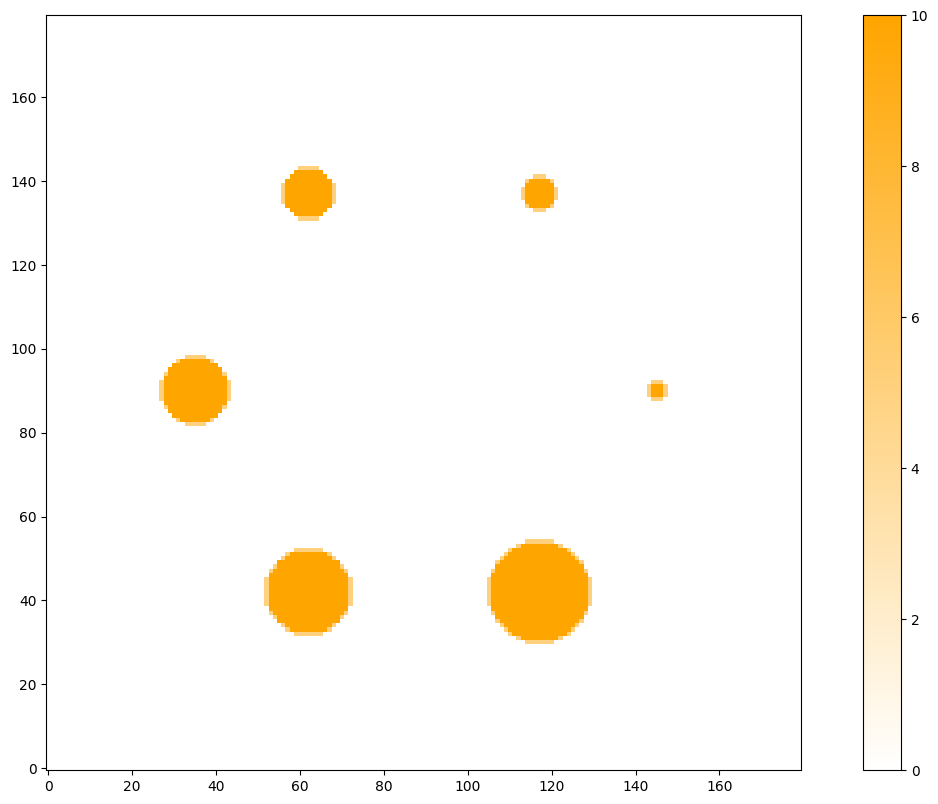

In [3]:
fig,ax = plt.subplots(figsize=(16,10),dpi=100)
norm=plt.Normalize(0,10)
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["white","orange"])
fig.colorbar(ax.imshow(img.T,origin='lower',cmap=cmap,norm=norm))


In [68]:
dataDir = "/home/fanghan/Work/SPEBT/Develop/data/2023/"
NImgX_ = 180
NImgY_ = 180
NDetY_ = 32
NModule_ = 6
NDetX_ = 24
fName = (
    "sysmat_24layer_Rot_0_of_2_2mmslitin10mm_1010_idxT0_numT1in1mm_IZ0_DZ0_100.sysmat"
)
data = np.fromfile("%s%s" % (dataDir, fName), dtype="single")
dataArr2D= data.reshape((NDetX_ * NModule_ * NDetY_, NImgX_ * NImgY_))
dataArr5D = dataArr2D.reshape((NDetX_, NModule_, NDetY_, NImgX_, NImgY_))

In [72]:
print(sys.getsizeof(data)/1024/1024,"MB")

569.5313568115234 MB


In [74]:
Nlayers = 1
sysmat = np.reshape(dataArr5D[:Nlayers,:,:,:,:],(Nlayers,NModule_,NDetY_,NImgX_ * NImgY_))

In [118]:
# 500 Bq/uL, 30s
# 10 * 1500 Count/uL

poisson_img = np.random.poisson(img*1500)
arr_dict={}
for Nlayers in range(1, 11):
    dataMat = np.reshape(dataArr5D[:Nlayers, :, :, :, :],(Nlayers*NModule_*NDetY_,NImgX_ * NImgY_))
    sysmat = dataMat[~np.all(dataMat == 0, axis=1)]
    fake_proj = np.matmul(sysmat, poisson_img.reshape(NImgX_ * NImgY_))
    arr_dict['%d-layers'%Nlayers] = fake_proj
    print(fake_proj.shape)
# for keys in arr_dict:
#     print(arr_dict[keys].shape)
np.savez("test.npz",**arr_dict)

(96,)
(192,)
(288,)
(384,)
(480,)
(576,)
(672,)
(768,)
(864,)
(960,)


In [119]:
npzfile = np.load("test.npz")
sorted(npzfile.files)

['1-layers',
 '10-layers',
 '2-layers',
 '3-layers',
 '4-layers',
 '5-layers',
 '6-layers',
 '7-layers',
 '8-layers',
 '9-layers']

# Test reconstruction

In [97]:
Nlayers=8
dataMat = np.reshape(dataArr5D[:Nlayers, :, :, :, :],(Nlayers*NModule_*NDetY_,NImgX_ * NImgY_))
# print(dataMat.shape)
sysmat = dataMat[~np.all(dataMat == 0, axis=1)]
print(sysmat.shape)

(768, 32400)


In [98]:
def backwardProj(lastArr, projArr, sysMat):
    forwardLast = np.matmul(sysMat, lastArr)
    quotients = projArr/forwardLast
    return np.matmul(quotients, sysMat)/np.sum(sysMat, axis=0)*lastArr

In [120]:

Nlayers=8
dataMatrix = np.reshape(dataArr5D[:Nlayers, :, :, :, :],(Nlayers*NModule_*NDetY_,NImgX_ * NImgY_))
sysMatrix = dataMatrix[~np.all(dataMatrix == 0, axis=1)]
matSum = np.sum(sysMatrix, axis=0, dtype=float)
validIdx = np.array(np.where(matSum != 0))
# validIdx=np.where(matSum != 0)
reducedMat = np.reshape(
    sysMatrix[:, validIdx], (sysMatrix.shape[0], validIdx.shape[1]))
projection = np.random.poisson(arr_dict['%d-layers'%Nlayers])
print(projection.shape)


(768,)


In [124]:
result = projection == np.floor(projection)
np.alltrue(result)

True

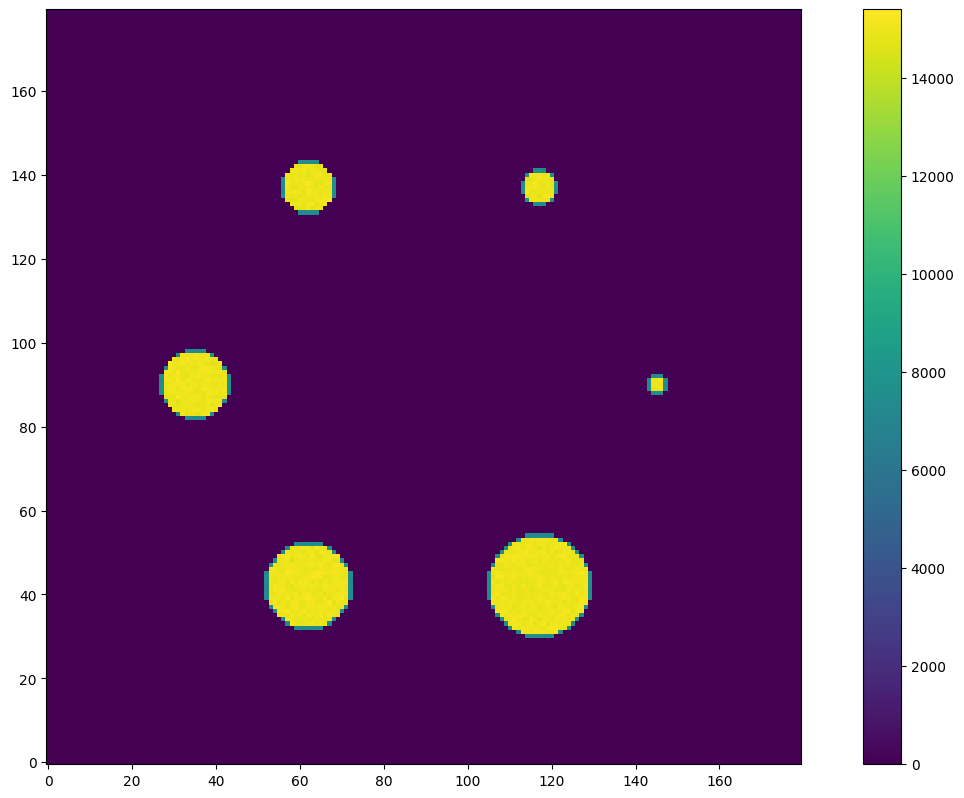

In [4]:
poisson_img = np.random.poisson(img*1500)
fig,ax = plt.subplots(figsize=(16,10),dpi=100)
# norm=plt.Normalize(0,10)
# cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["white","orange"])
fig.colorbar(ax.imshow(poisson_img.T,origin='lower'))

In [142]:
def myfunc(k,mean):
    return mean**k * math.exp(-mean)/math.factorial(k)
vmyfunc = np.vectorize(myfunc)

def my_log_gaus(xx,mean):
    return np.log(1/np.sqrt(2*3.1416*mean)*np.exp(-(xx-mean)**2/(2*mean)))

In [144]:
print(np.mean(projection),np.std(projection))

193.20442708333334 251.57342084200974


In [148]:
NIteration = 50
print((reducedMat.shape))
reconImg = np.ones(reducedMat.shape[1])*200
for iter in range(NIteration):
        reconImg = backwardProj(reconImg, projection, reducedMat)
        probs = my_log_gaus(projection,np.matmul(reducedMat,reconImg))
        print(np.sum(probs))

(768, 25448)
-16986.88058687158
-13452.447669771704
-11830.541791812308
-10927.880659910135
-10316.508035931633
-9835.053917783689
-9418.851627158714
-9040.331623496502
-8687.09621157753
-8353.370433099135
-8036.435049551063
-7735.02556840412
-7448.561829972326
-7176.756454373724
-6919.410446535765
-6676.308277744065
-6447.168846539169
-6231.628690674026
-6029.243616259285
-5839.50018640772
-5661.831647852365
-5495.634899432164
-5340.2864815509765
-5195.156510988732
-5059.620121284686
-4933.066374700777
-4814.904848296583
-4704.570213433049
-4601.525165117404
-4505.262046019462
-4415.3034723530545
-4331.202220498197
-4252.540583821625
-4178.929363938968
-4110.006622032909
-4045.4362843538593
-3984.906671218165
-3928.1289997470803
-3874.8358961877625
-3824.7799429110923
-3777.732277219276
-3733.481253216267
-3691.8311736544574
-3652.601095466862
-3615.6237103294857
-3580.7442998602096
-3547.8197637950325
-3516.7177185789396
-3487.315663185486
-3459.5002085750493


In [ ]:
ks = np.arange(1,5)
means = np.array([0.5,2.1,3.6,4.7])
vmyfunc = np.vectorize(myfunc)
print(vmyfunc(ks,means))
for k,mean in zip(ks,means):
    print(myfunc(k,mean))

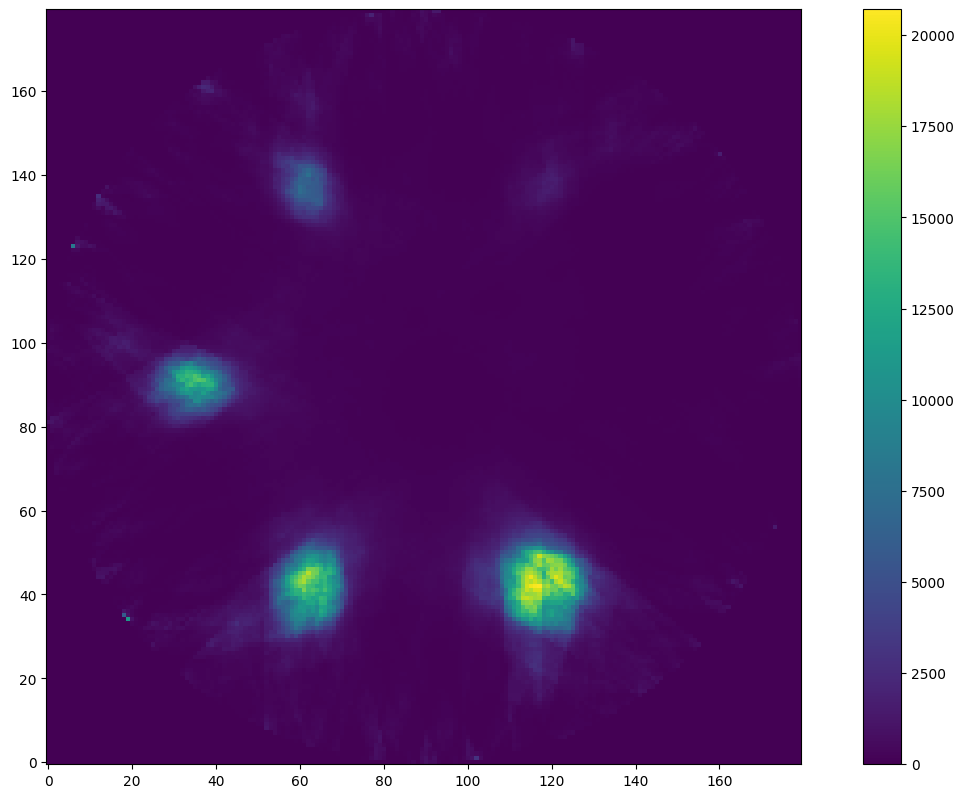

In [149]:
fig,ax = plt.subplots(figsize=(16,10),dpi=100)
plotImg = np.zeros((NImgX_ * NImgY_))
plotImg[validIdx] = reconImg
# norm=plt.Normalize(0,10)
# cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["white","orange"])
fig.colorbar(ax.imshow(np.reshape(plotImg,(NImgX_,NImgY_)).T,origin='lower'))

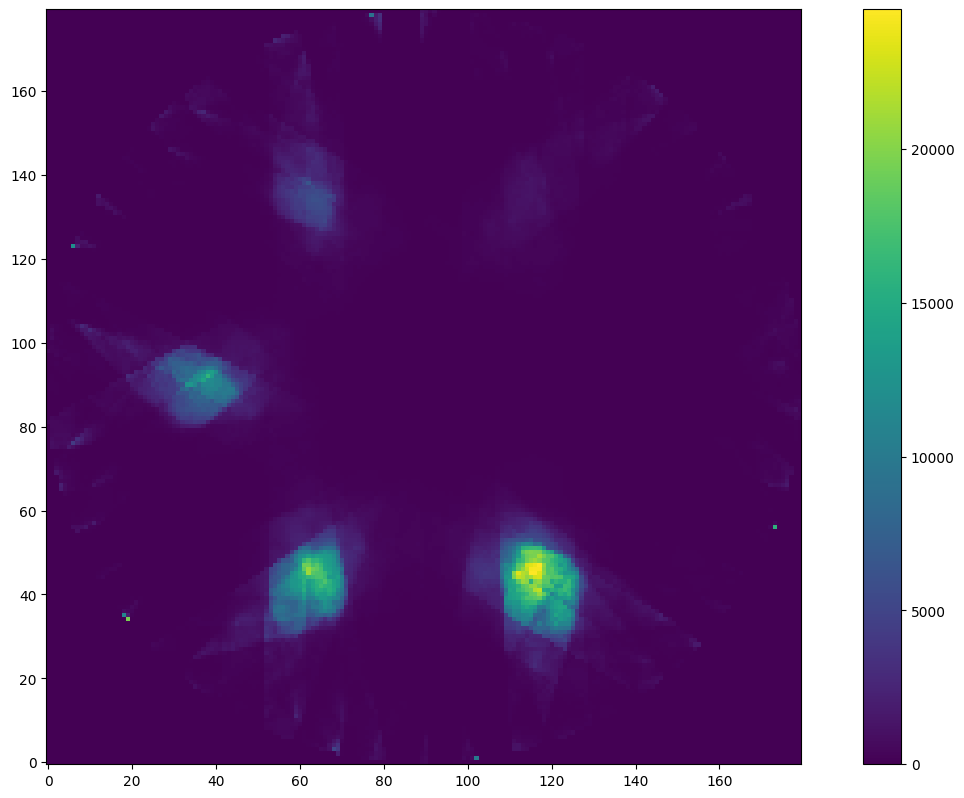

In [151]:

NIteration = 100
Nlayers=2
dataMatrix = np.reshape(dataArr5D[:Nlayers, :, :, :, :],(Nlayers*NModule_*NDetY_,NImgX_ * NImgY_))
sysMatrix = dataMatrix[~np.all(dataMatrix == 0, axis=1)]
matSum = np.sum(sysMatrix, axis=0, dtype=float)
validIdx = np.array(np.where(matSum != 0))
# validIdx=np.where(matSum != 0)
reducedMat = np.reshape(
    sysMatrix[:, validIdx], (sysMatrix.shape[0], validIdx.shape[1]))
projection = np.random.poisson(arr_dict['%d-layers'%Nlayers])

reconImg = np.ones(reducedMat.shape[1])*200
for iter in range(NIteration):
        reconImg = backwardProj(reconImg, projection, reducedMat)
        # probs = my_log_gaus(projection,np.matmul(reducedMat,reconImg))
        # print(np.sum(probs))
fig,ax = plt.subplots(figsize=(16,10),dpi=100)
plotImg = np.zeros((NImgX_ * NImgY_))
plotImg[validIdx] = reconImg
# norm=plt.Normalize(0,10)
# cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["white","orange"])
fig.colorbar(ax.imshow(np.reshape(plotImg,(NImgX_,NImgY_)).T,origin='lower'))

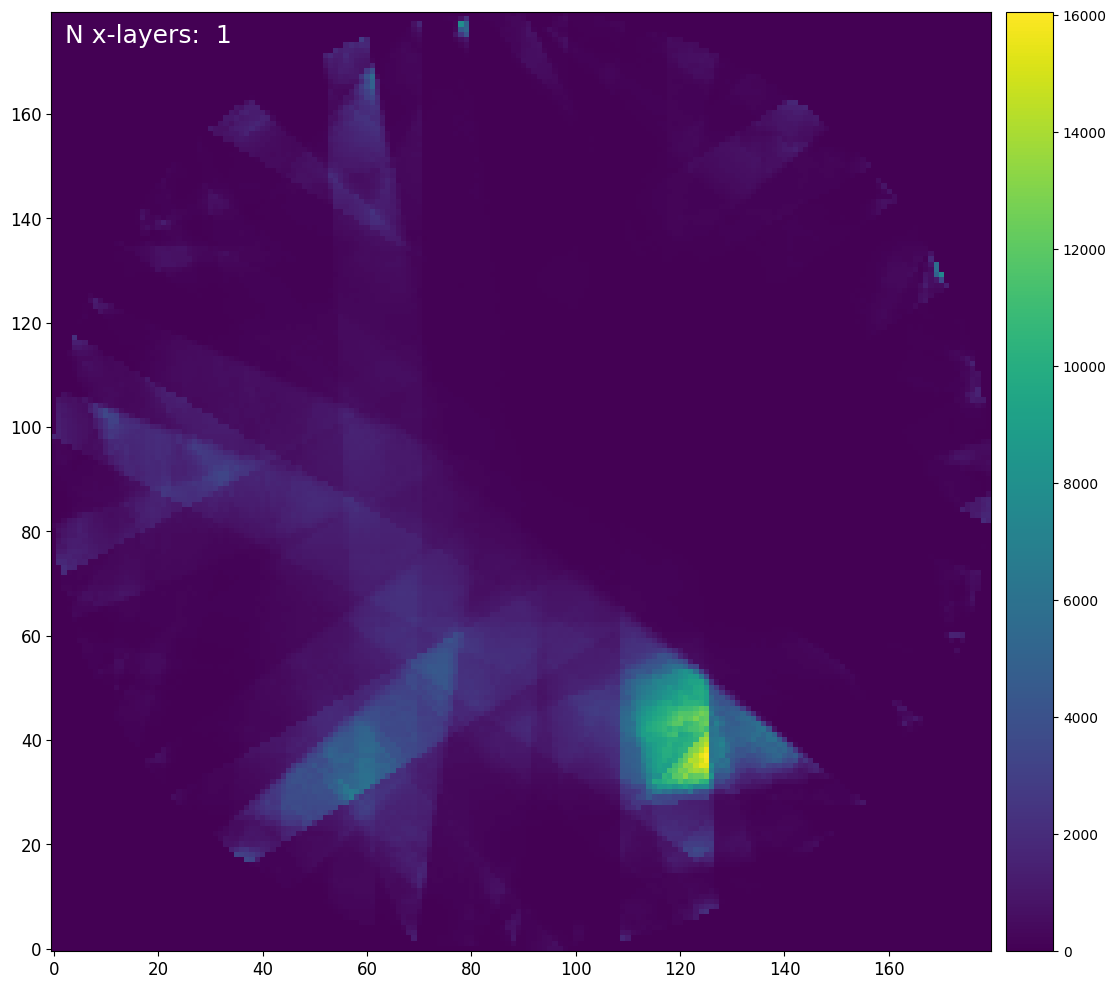

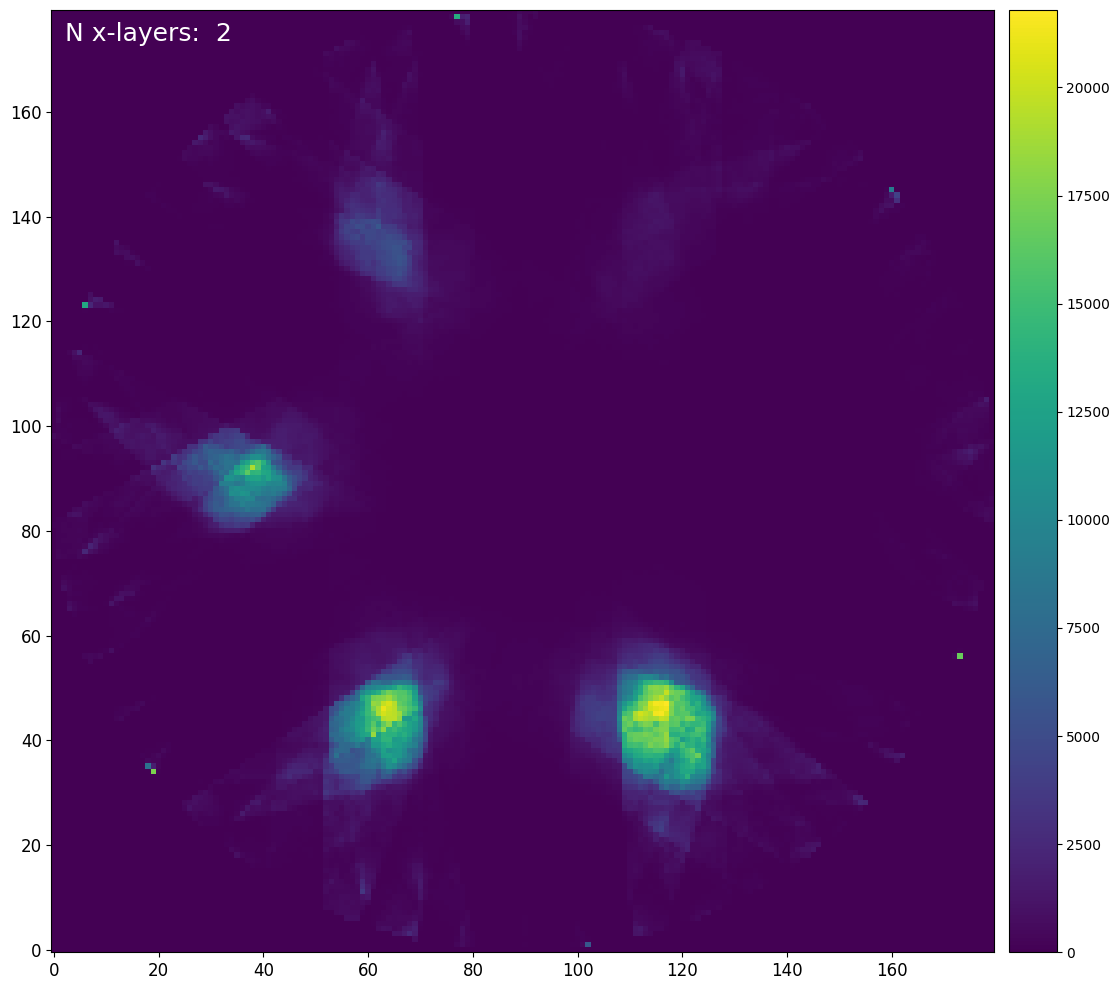

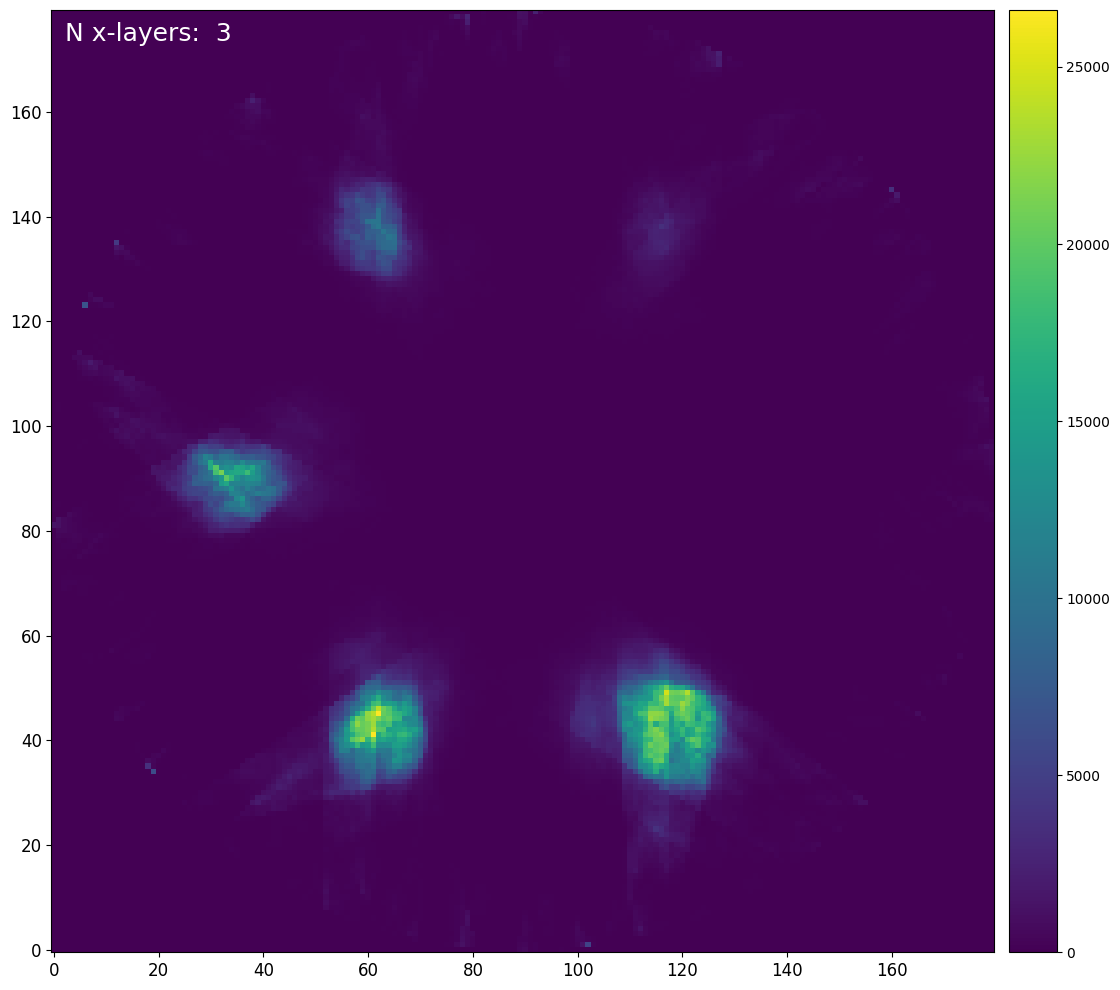

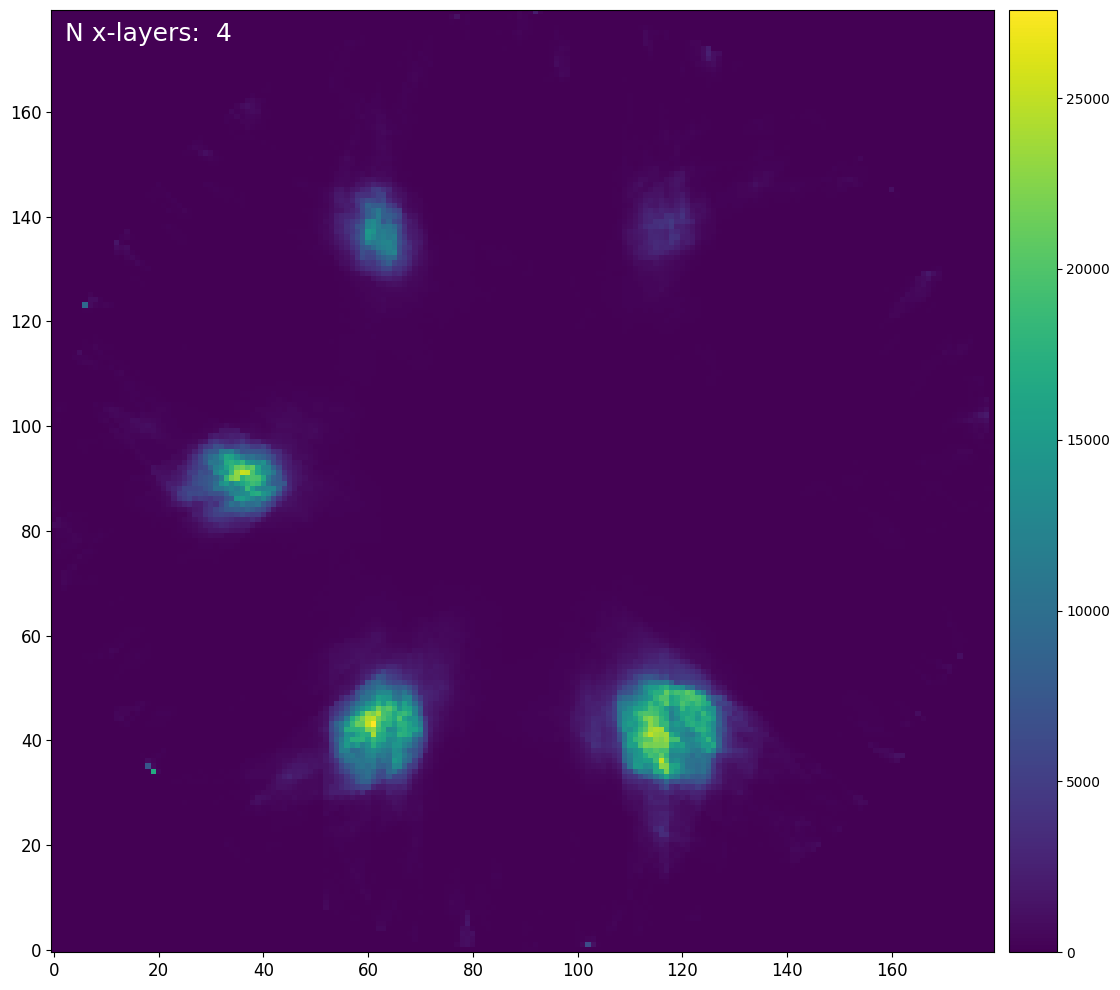

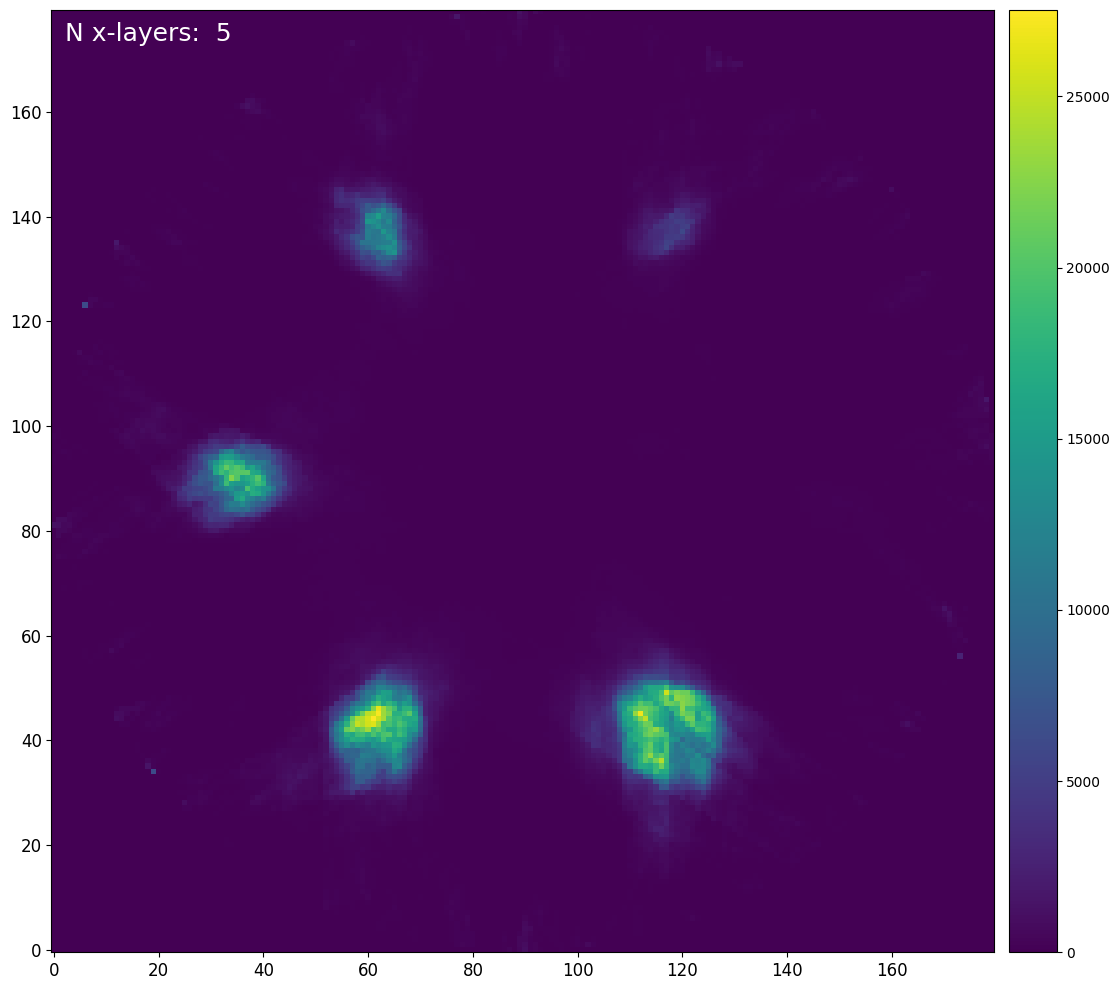

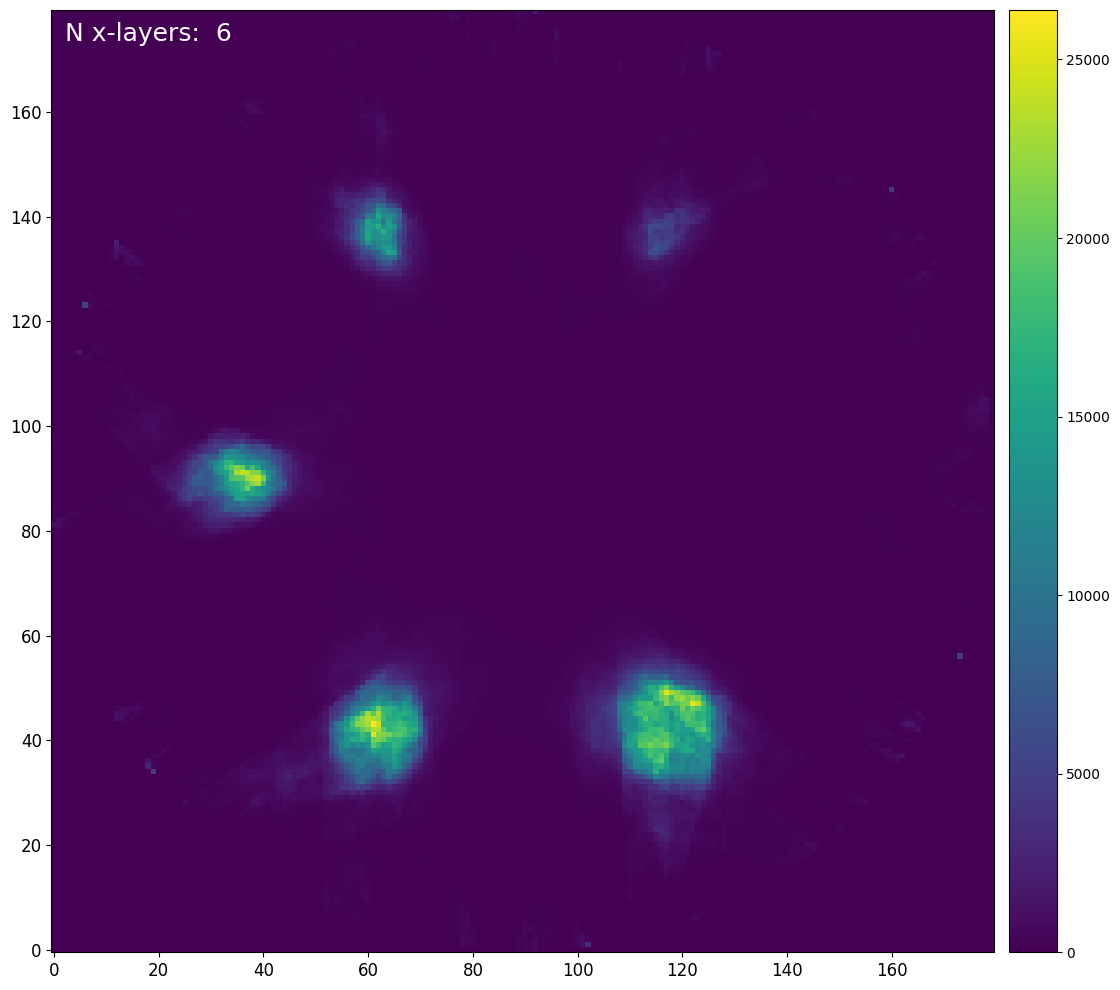

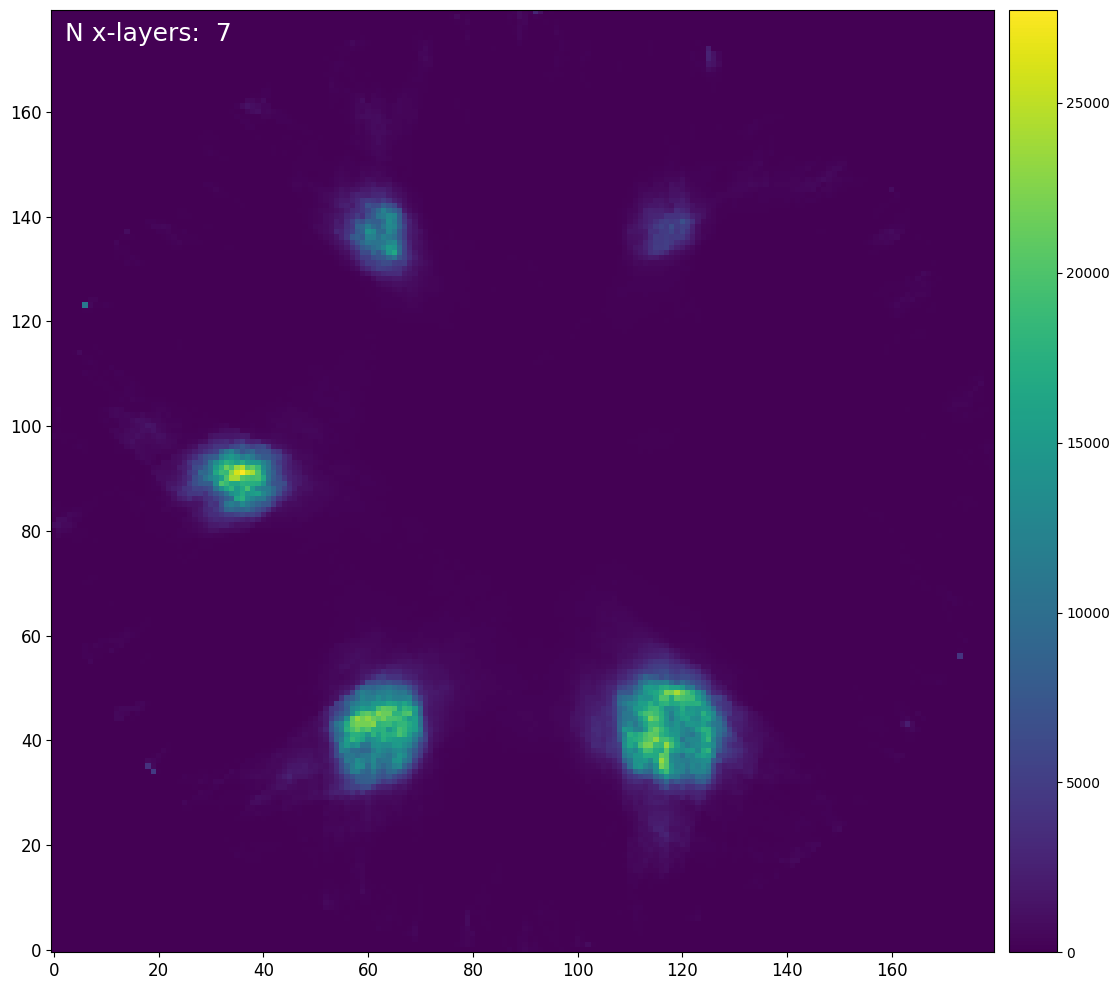

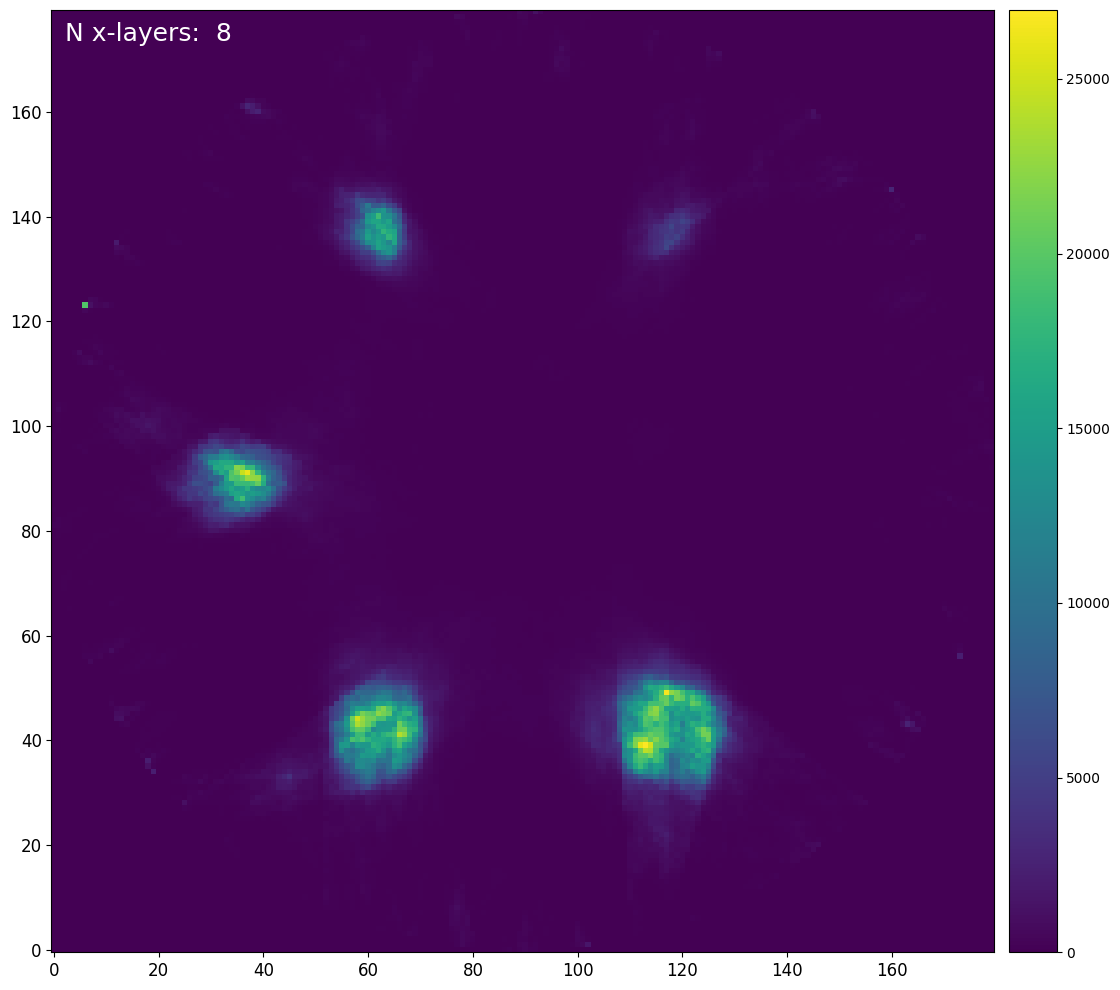

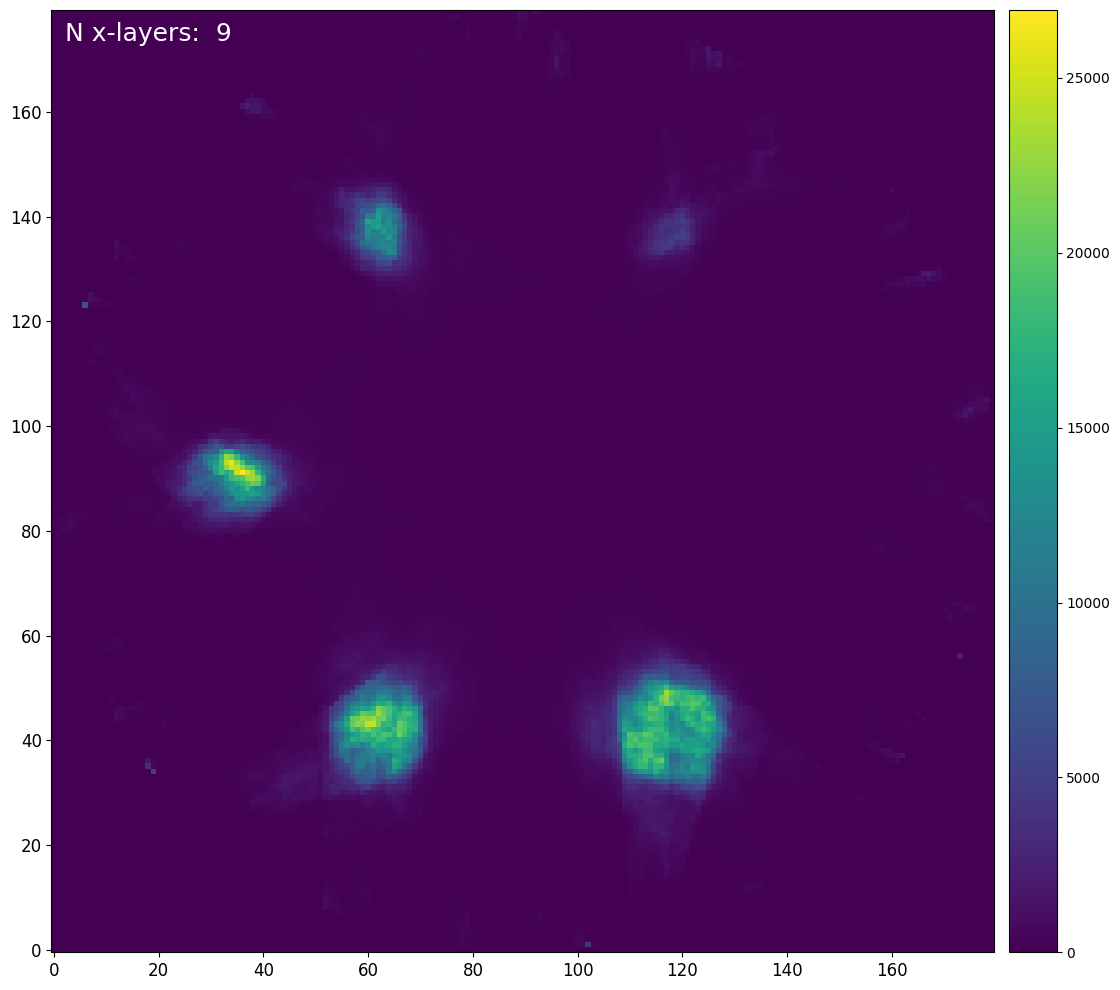

In [164]:
NIteration = 100
for Nlayers in range(1,10):
    dataMatrix = np.reshape(dataArr5D[:Nlayers, :, :, :, :],(Nlayers*NModule_*NDetY_,NImgX_ * NImgY_))
    sysMatrix = dataMatrix[~np.all(dataMatrix == 0, axis=1)]
    matSum = np.sum(sysMatrix, axis=0, dtype=float)
    validIdx = np.array(np.where(matSum != 0))
    reducedMat = np.reshape(
        sysMatrix[:, validIdx], (sysMatrix.shape[0], validIdx.shape[1]))
    projection = np.random.poisson(arr_dict['%d-layers'%Nlayers])

    reconImg = np.ones(reducedMat.shape[1])*200
    for iter in range(NIteration):
            reconImg = backwardProj(reconImg, projection, reducedMat)
    fig,ax = plt.subplots(figsize=(16,10),dpi=100)
    plotImg = np.zeros((NImgX_ * NImgY_))
    plotImg[validIdx] = reconImg
    mytext="N x-layers: %2d"% Nlayers
    ax.annotate(mytext,
                xy=(2, 175), xycoords='data',fontsize=18,
                horizontalalignment='left',
                verticalalignment='center',color="white")
    ax.tick_params(labelsize=12)
    fig.colorbar(ax.imshow(np.reshape(plotImg,(NImgX_,NImgY_)).T,origin='lower'),pad=0.01)
    plt.tight_layout()
    fig.savefig("%d-x-layers-recon.png"%Nlayers)

In [1]:
img = np.zeros((imgN_x_,imgN_y_))
img[89,89]=10
fig, ax = plt.subplots(figsize=(11, 10), dpi=100)
norm = plt.Normalize(0, 10)
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["white", "orange"])
cbar = fig.colorbar(
    ax.imshow(
        img.T, origin="lower", cmap=mpl.colormaps["gray"], norm=norm, aspect="equal"
    ),
    pad=0.01,
)

NameError: name 'np' is not defined

In [ ]:
import os
outDir='output/'
if os.path.exists(outDir)!= True:
    try:
        os.mkdir(outDir)
    except Exception as err:
        print(err)
        exit(2)
outImgName='dot_phantom_plot_%dx%d.png'%(imgN_x_,imgN_y_)
outNpzName='dot_phantom_data_%dx%d.npz'%(imgN_x_,imgN_y_)
print("Save phantom plot to",outDir+outImgName)
fig.savefig(outDir+outImgName,dpi=100)
print("Save phantom data to",outDir+outNpzName)
np.savez_compressed(outDir+outNpzName,phantom=img,mask=mask)